In [ ]:
# matplotlib 한글 폰트 적용
# 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,647 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)


In [ ]:
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로딩

In [ ]:
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_image.shape, test_image.shape, train_label.shape, test_label.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])

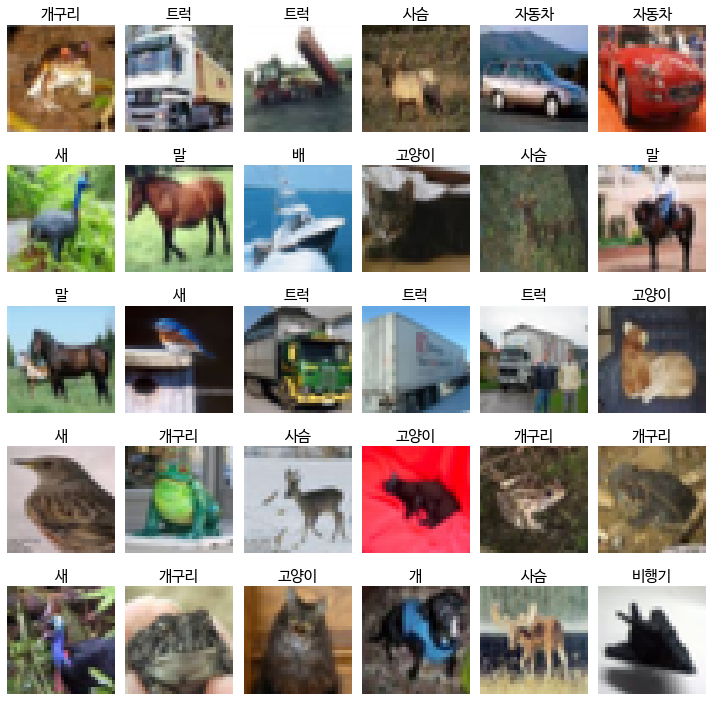

In [ ]:
# 이미지 확인
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(train_image[i])
    plt.title(class_names[train_label[i,0]], fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()    

# 데이터 전처리
- X: 0 ~ 1 scaling
- y: onehot encoding

In [ ]:
X_train = train_image.astype(np.float32)/255.0
X_test = test_image.astype(np.float32)/255.0

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

np.min(X_train), np.max(X_train), y_train.shape, y_test.shape

(0.0, 1.0, (50000, 10), (10000, 10))

# 하이퍼파라미터, 변수 정의

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 200
N_BATCHS  = 10000

N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 32

# Dataset 생성
- train/test set

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 모델 생성 및 컴파일
- CNN 모델을 이용해 10개의 class를 분류하는 모델을 구현

In [ ]:
def create_cifar10_model():
    model = keras.Sequential()

    model.add(layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    
    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))
    
    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())              
    model.add(layers.MaxPool2D(padding='same'))
    
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=10, activation='softmax')) 

    return model

In [ ]:
model = create_cifar10_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 64)        0

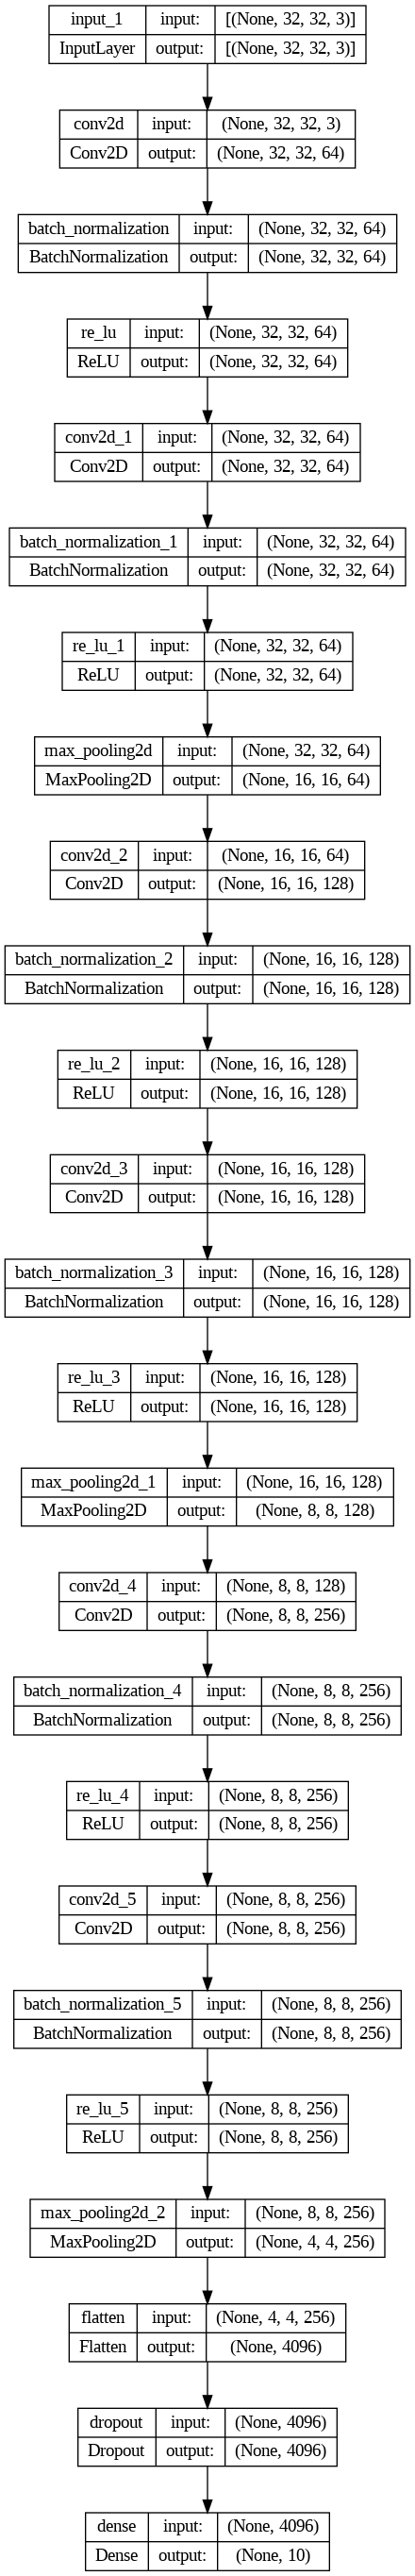

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# 학습 및 평가
- callback을 이용해 early stopping, 가장 성능 좋았을때 모델 저장 하세요.
    - 모델은 자신의 google drive에 저장하세요.
- 저장됬던 모델을 loading한 뒤 그 모델도 평가해보세요.

In [1]:
import os
base_dir = '/content/drive/MyDrive'
save_dir = os.path.join(base_dir, "saved_models2", "cifa10_model")
print(save_dir)

/content/drive/MyDrive/saved_models2/cifa10_model_{epoch}


In [ ]:
# callback 생성
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_dir, 
                                              save_best_only=True, 
                                              monitor='val_loss', 
                                              verbose=1)

In [ ]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset
                 ,callbacks=[es_callback, mc_callback])

Epoch 1/200
499/500 [============================>.] - ETA: 0s - loss: 1.5515 - accuracy: 0.4862
Epoch 1: val_loss improved from inf to 1.51171, saving model to /content/drive/MyDrive/saved_models2/cifa10_model


500/500 [==============================] - 30s 36ms/step - loss: 1.5510 - accuracy: 0.4863 - val_loss: 1.5117 - val_accuracy: 0.4543
Epoch 2/200
500/500 [==============================] - ETA: 0s - loss: 0.8779 - accuracy: 0.6922
Epoch 2: val_loss improved from 1.51171 to 1.01547, saving model to /content/drive/MyDrive/saved_models2/cifa10_model


500/500 [==============================] - 18s 36ms/step - loss: 0.8779 - accuracy: 0.6922 - val_loss: 1.0155 - val_accuracy: 0.6702
Epoch 3/200
499/500 [============================>.] - ETA: 0s - loss: 0.6806 - accuracy: 0.7627
Epoch 3: val_loss improved from 1.01547 to 0.83877, saving model to /content/drive/MyDrive/saved_models2/cifa10_model


500/500 [==============================] - 17s 34ms/step - loss: 0.6807 - accuracy: 0.7626 - val_loss: 0.8388 - val_accuracy: 0.7114
Epoch 4/200
500/500 [==============================] - ETA: 0s - loss: 0.5670 - accuracy: 0.8055
Epoch 4: val_loss improved from 0.83877 to 0.63792, saving model to /content/drive/MyDrive/saved_models2/cifa10_model


500/500 [==============================] - 17s 34ms/step - loss: 0.5670 - accuracy: 0.8055 - val_loss: 0.6379 - val_accuracy: 0.7809
Epoch 5/200
499/500 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.8322
Epoch 5: val_loss did not improve from 0.63792
500/500 [==============================] - 14s 28ms/step - loss: 0.4828 - accuracy: 0.8322 - val_loss: 0.6736 - val_accuracy: 0.7725
Epoch 6/200
500/500 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8559
Epoch 6: val_loss did not improve from 0.63792
500/500 [==============================] - 15s 29ms/step - loss: 0.4142 - accuracy: 0.8559 - val_loss: 0.6473 - val_accuracy: 0.7709
Epoch 7/200
500/500 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.8760
Epoch 7: val_loss improved from 0.63792 to 0.58615, saving model to /content/drive/MyDrive/saved_models2/cifa10_model


500/500 [==============================] - 18s 35ms/step - loss: 0.3548 - accuracy: 0.8760 - val_loss: 0.5862 - val_accuracy: 0.8072
Epoch 8/200
499/500 [============================>.] - ETA: 0s - loss: 0.3004 - accuracy: 0.8964
Epoch 8: val_loss did not improve from 0.58615
500/500 [==============================] - 14s 28ms/step - loss: 0.3004 - accuracy: 0.8963 - val_loss: 0.7559 - val_accuracy: 0.7724
Epoch 9/200
499/500 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.9088
Epoch 9: val_loss did not improve from 0.58615
500/500 [==============================] - 14s 28ms/step - loss: 0.2563 - accuracy: 0.9088 - val_loss: 0.6825 - val_accuracy: 0.7892
Epoch 10/200
499/500 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9230
Epoch 10: val_loss did not improve from 0.58615
500/500 [==============================] - 14s 28ms/step - loss: 0.2180 - accuracy: 0.9230 - val_loss: 0.8724 - val_accuracy: 0.7447
Epoch 11/200
499/500 [============

500/500 [==============================] - 17s 35ms/step - loss: 0.1366 - accuracy: 0.9516 - val_loss: 0.5818 - val_accuracy: 0.8391
Epoch 14/200
500/500 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9582
Epoch 14: val_loss did not improve from 0.58177
500/500 [==============================] - 14s 28ms/step - loss: 0.1171 - accuracy: 0.9582 - val_loss: 0.5912 - val_accuracy: 0.8432
Epoch 15/200
499/500 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9632
Epoch 15: val_loss did not improve from 0.58177
500/500 [==============================] - 14s 28ms/step - loss: 0.1039 - accuracy: 0.9632 - val_loss: 0.6678 - val_accuracy: 0.8337
Epoch 16/200
499/500 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9667
Epoch 16: val_loss did not improve from 0.58177
500/500 [==============================] - 14s 28ms/step - loss: 0.0939 - accuracy: 0.9667 - val_loss: 0.6644 - val_accuracy: 0.8432
Epoch 17/200
499/500 [========

### loss/accuracy 시각화 함수

In [ ]:
0.6287 

In [ ]:
# loss 그래프
def plot_loss(history):
    plt.plot(history.epoch, history.history['loss'], label='Train loss')
    plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
# accuracy 그래프
def plot_accuracy(history):
    plt.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()    

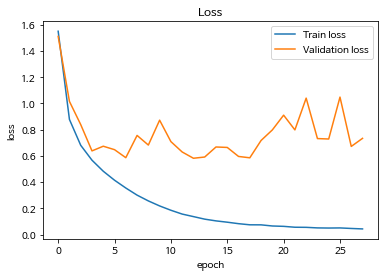

In [ ]:
plot_loss(hist)

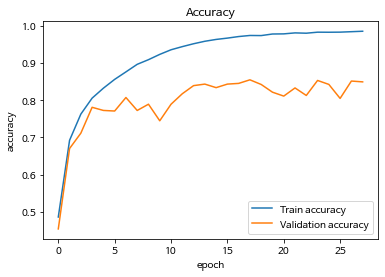

In [ ]:
plot_accuracy(hist)

### 저장된 모델 로딩 및 평가

In [ ]:
load_model = keras.models.load_model(save_dir)

In [ ]:
loss, accuracy = load_model.evaluate(test_dataset)

100/100 [==============================] - 1s 11ms/step - loss: 0.5818 - accuracy: 0.8391


In [ ]:
loss, accuracy

(0.5817725658416748, 0.8391000032424927)